## Ej. 1. 
<font color='blue'> Una urna contiene 10 bolas de las cuales 6 son rojas y 4 negras. Se sacan al azar tres bolas consecutivamente y sin reemplazamiento. Sea X la variable aleatoria ``número de bolas negras obtenidas''. Se pide:
</font>    
* <font color='blue'>Calcula P(X = 0), P(X = 1), P(X = 2) y P(X = 3)</font>  
* <font color='blue'>Calcular la función de probabilidad y la función de distribución de X. Representa ambas funciones gráficamente.</font>  
* <font color='blue'>Calcular la esperanza, la varianza y la desviación típica de X.</font>  
* <font color='blue'>Haz un programa que simule la variable anterior. Genera 1000 datos y compara sus tablas de frecuencias relativas y relativas acumuladas, barplot, media y varianza con los resultados de los apartados anteriores.
</font> 



Antes de empezar, conviene cargar los paquetes que podamos necesitar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

Lo primero que hacemos es calcular la función densidad de probabilidad de la v.a. X. Esta variable toma valores en $\{0,1,2,3\}$ pues a lo sumo habrá tres bolas negras y,mevidentemente, podría no salir ninguna. 
<<>>=
val <- c(0,1,2,3)
val
@
Las probabilidades se calculan contanto caos favorables frente a casos totales. Por ejemplo, $P(X=0)$ es la probabilidad de que todas las bolas extraidas sean rojas, lo que se puede hacer de $\binom{6}{3}=\frac{4\cdot 5\cdot 6}{1\cdot 2\cdot 3}=20$ formas. Mientras que extraer 3 bolas de la urna (de 10) se puede hacer de $\binom{10}{3}=\frac{8\cdot 9\cdot 10}{1\cdot 2\cdot 3}=120$ formas, por lo que $P(X=0)=20/120$. El resto de probabilidades se calculan de forma similar.

In [2]:
val=np.array([0,1,2,3])
val

array([0, 1, 2, 3])

In [3]:
prob=np.array([20/120, 60/120, 36/120, 4/120])
prob

array([0.16666667, 0.5       , 0.3       , 0.03333333])

In [4]:
cumsum_prob = np.cumsum(prob)
print("Cumulative sum of probabilities:", cumsum_prob)

Cumulative sum of probabilities: [0.16666667 0.66666667 0.96666667 1.        ]


Obsérvese que val==h es un vector del mismo tamaño que val, obtenido de averiguar componente a componente cuál vale h, por tanto, como val y prob tienen el mismo tamaño, podemos hacer prob[val==h] para filtrar  la componente de prob donde se da la igualdad,
lo cual permite definir la función densidad de probablidad:

In [5]:
def f(x):
    return np.sum(prob[val == x])

In [6]:
f(1)

0.5

In [7]:
f(2/3)

0.0

Resulta muy útil modificar la función f para que esta pueda aplicarse directamente a vectores - de modo que: $$f([x_1,\cdots,x_k])=[f(x_1),\cdots,f(x_k)]$$
(eso facilita, por ejemplo, dibujar f). 

Esto se consigue con la orden siguiente:

In [8]:
f_vec = np.vectorize(f)

In [9]:
f_vec([1,3])

array([0.5       , 0.03333333])

Alternativamente, también podemos programar la vectorización de la función:

In [10]:
def f_vec(val):
    result=[]
    for _ in val:
        result.append(f(_))
    return result

In [11]:
f_vec([1,3])

[0.5, 0.03333333333333333]

Ahora podemos definir la función de distribución:

In [12]:
# Define the function F(x) which computes the cumulative sum of probabilities up to x
def F(x):
    return np.sum(prob[val <= x])

# Vectorize the function F for the entire val range
F_vec = np.vectorize(F)

Ahora pintamos ambas funciones: la Pmf y la función de Distribución:

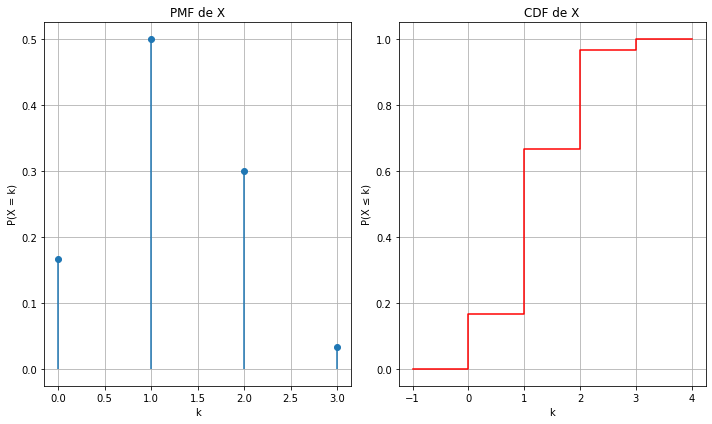

In [13]:
# Gráficas 

plt.figure(figsize=(10, 6))

# Gráfica de la función densidad de probabilidad (PMF) f_X
plt.subplot(1, 2, 1)
plt.stem(val, f_vec(val), basefmt=" ", use_line_collection=True)
plt.title("PMF de X")
plt.xlabel("k")
plt.ylabel("P(X = k)")
plt.grid(True)

# Gráfica de la función distribución de probabilidad (CDF) F_X
plt.subplot(1, 2, 2)
x_vals = np.array([min(val)-1, *val, max(val)+1])  # Auxiliary variable for extended range
plt.step(x_vals, F_vec(x_vals), where='post', color='r', linestyle='-')
plt.title("CDF de X")
plt.xlabel("k")
plt.ylabel("P(X ≤ k)")
plt.grid(True)

# Mostramos las gráficas
plt.tight_layout()
plt.show()


Ahora podemos calcular media, varianza, etc. de la v.a. X. 



In [15]:
# Cálculo de la media (o esperanza)
media_X = np.sum(val * f_vec(val))
print("Media :", media_X)

# Cálculo de la varianza 
var_X = np.sum((val - media_X)**2 * f_vec(val))
print("Varianza :", var_X)

# Cálculo de la desviación típica
dt_X = np.sqrt(var_X)
print("Desviación típica :", dt_X)

Media : 1.2000000000000002
Varianza : 0.5599999999999999
Desviación típica : 0.7483314773547882


Hacemos ahora un programa que simule la variable. Esto se logra usando randon.choice con la distribución de probabilidades de la v.a. 

Utilizamos el programa que hemos creado para generar 10000 datos y comparamos sus tablas de frecuencias relativas y relativas acumuladas, barplot, media y varianza con los resultados de los apartados anteriores.

In [16]:
# Generate 10000 samples from the distribution defined by prob
datos = np.random.choice(val, size=10000, p=prob, replace=True)

# Frequency table and its cumulative sum
tabla_frec = pd.Series(datos).value_counts(normalize=True).sort_index()
tabla_frec_acum = tabla_frec.cumsum()

print("Frequency table:", tabla_frec)
print("Cumulative frequency table:", tabla_frec_acum)

Frequency table: 0    0.1678
1    0.4894
2    0.3067
3    0.0361
dtype: float64
Cumulative frequency table: 0    0.1678
1    0.6572
2    0.9639
3    1.0000
dtype: float64


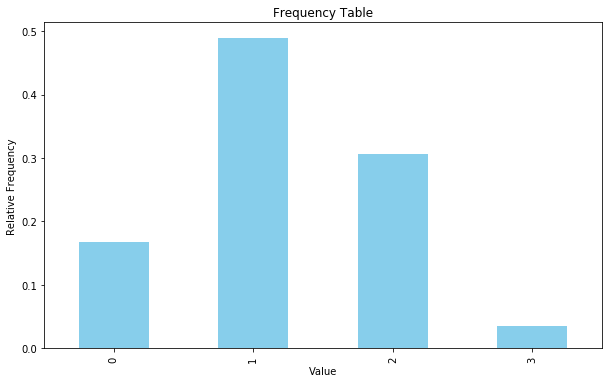

In [17]:
# Plot the frequency table
plt.figure(figsize=(10, 6))
tabla_frec.plot(kind='bar', color='skyblue')
plt.title('Frequency Table')
plt.xlabel('Value')
plt.ylabel('Relative Frequency')
plt.show()

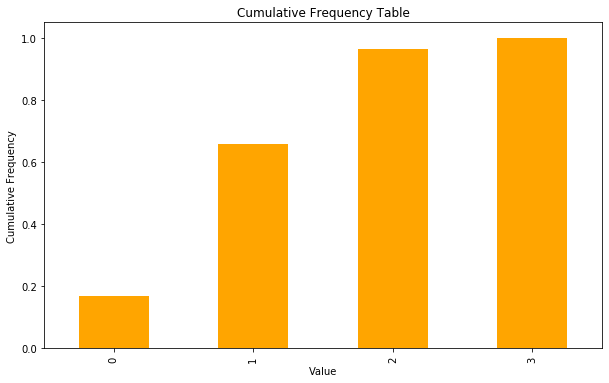

In [18]:
# Plot the cumulative frequency table
plt.figure(figsize=(10, 6))
tabla_frec_acum.plot(kind='bar', color='orange')
plt.title('Cumulative Frequency Table')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')
plt.show()

# Otro modo de simular la v.a. es mediante el cálculo de percentiles: 

In [19]:
# Function to compute the percentile 
def percentile(p):
    for a in val:
        if F(a) >= p:
            return a
        
## Aquí es importante observar que val se presenta ordenado de menor a mayor 
## y se lee (con el for) de izquierda a derecha

percentile_vec = np.vectorize(percentile)
Q1,Q2,Q3=percentile_vec([0.25,0.5,0.75])
[Q1,Q2,Q3]

[1, 1, 2]

Ahora podemos generar 10000 muestras de $U\sim {\rm Unif}(0,1)$ y calcular sus percentiles:

In [20]:
# Generate 10,000 random numbers between 0 and 1
random_values = np.random.uniform(0, 1, 10000)

# Compute the percentiles for the random values
datos = percentile_vec(random_values)

In [21]:
# Frequency table and its cumulative sum
tabla_frec = pd.Series(datos).value_counts(normalize=True).sort_index()
tabla_frec_acum = tabla_frec.cumsum()

print("Frequency table:", tabla_frec)
print("Cumulative frequency table:", tabla_frec_acum)

Frequency table: 0    0.1705
1    0.4963
2    0.2992
3    0.0340
dtype: float64
Cumulative frequency table: 0    0.1705
1    0.6668
2    0.9660
3    1.0000
dtype: float64


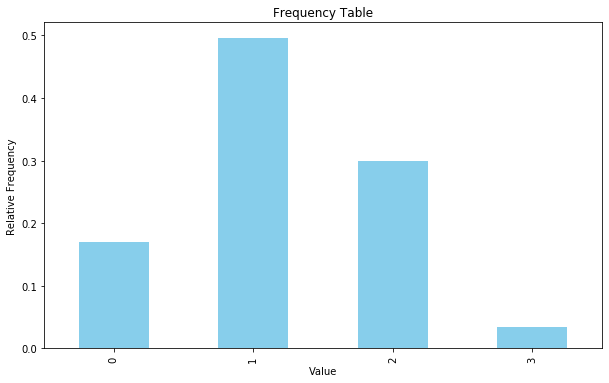

In [22]:
# Plot the frequency table
plt.figure(figsize=(10, 6))
tabla_frec.plot(kind='bar', color='skyblue')
plt.title('Frequency Table')
plt.xlabel('Value')
plt.ylabel('Relative Frequency')
plt.show()

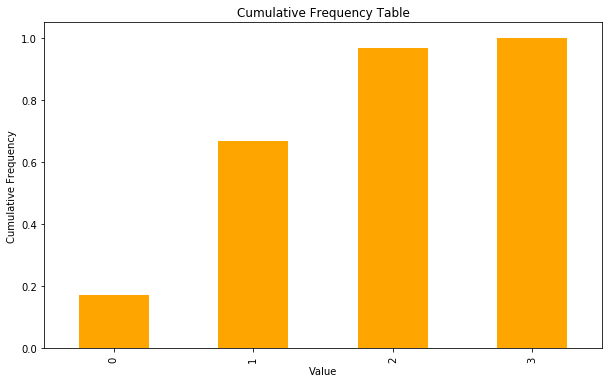

In [23]:
plt.figure(figsize=(10, 6))
tabla_frec_acum.plot(kind='bar', color='orange')
plt.title('Cumulative Frequency Table')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')
plt.show()

In [24]:
# Compare the theoretical and empirical mean, variance, and standard deviation
print(f"Empirical Mean: {np.mean(datos)}, Theoretical Mean: {media_X}")
print(f"Empirical Variance: {np.var(datos)}, Theoretical Variance: {var_X}")
print(f"Empirical Standard Deviation: {np.std(datos)}, Theoretical Standard Deviation: {dt_X}")

# Quantiles (25th, 50th, 75th percentiles)
Q = np.quantile(datos, [0.25, 0.5, 0.75])
print("Empirical Quantiles (25%, 50%, 75%):", Q)

# Theoretical percentiles
percentiles = np.array([percentile(0.25), percentile(0.5), percentile(0.75)])
print("Theoretical Percentiles (25%, 50%, 75%):", percentiles)

Empirical Mean: 1.1967, Theoretical Mean: 1.2000000000000002
Empirical Variance: 0.5670091100000001, Theoretical Variance: 0.5599999999999999
Empirical Standard Deviation: 0.7530000730411652, Theoretical Standard Deviation: 0.7483314773547882
Empirical Quantiles (25%, 50%, 75%): [1. 1. 2.]
Theoretical Percentiles (25%, 50%, 75%): [1 1 2]



## 2. 
<font color='blue'> Los posibles valores de una variable aleatoria X así como su función de probabilidad aparecen en la siguiente tabla:</font>


In [25]:
#   1    2   3     4    5    6    7    8  9     10
# 0.04 0.06 0.04 0.06 0.04 0.06 0.04 0.06 0.04 0.06
#   11  12  13    14   15    16  17   18   19   20
# 0.04 0.06 0.04 0.06 0.04 0.06 0.04 0.06 0.04 0.06

* <font color='blue'> Calcula la función de distribución </font>
* <font color='blue'> Dibuja las funciones de densidad y distribución.</font>
* <font color='blue'> Escribe una función que calcule percentiles de X. </font>
* <font color='blue'> Calcula los cuartiles Q1, Q2 y Q3, el rango intercuartílico e indica si hay datos atípicos. </font>
* <font color='blue'> Calcula las siguientes probabilidades:</font>


In [26]:
# • P(X ≤ 5)
# • P(X < 17)
# • P(X > 12)
# • P(X ≥ 7)
# • P(4 < X < 15)
# • P(4 ≤ X ≤ 15)
# • P(4 < X ≤ 15)
# • P(4 ≤ X < 15)

* <font color='blue'> Calcula $E[3X^2-X]$ </font>

* <font color='blue'> Haz un programa que simule la variable anterior. Genera 1000 datos y compara sus tablas de frecuencias relativas y relativas acumuladas, barplot, media, varianza, cuartiles y boxplot con los resultados de los apartados anteriores.</font> 

<strong> Solución: </strong> Comenzamos con el cálculo de la función de densidad y la función de distribución:

In [27]:
import numpy as np

# Equivalente a val = 1:20 en R
val = np.arange(1, 21)

# Alterna 0.04 y 0.06, repetido 10 veces
prob = np.tile([0.04, 0.06], 10)

# f(x): devuelve la probabilidad asociada al valor x
def f(x):
    return prob[val == x]

# Vectoriza la función para que acepte arrays
f = np.vectorize(f)

# F(x): suma acumulada de probabilidades para val <= x
def F(x):
    return np.sum(prob[val <= x])

# Vectoriza también esta función
F = np.vectorize(F)

Ahora las pintamos:

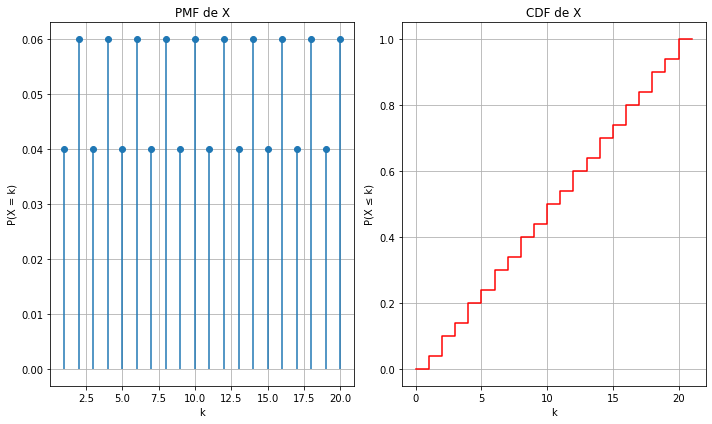

In [28]:
# Gráficas 

plt.figure(figsize=(10, 6))

# Gráfica de la función densidad de probabilidad (PMF) f_X
plt.subplot(1, 2, 1)
plt.stem(val, f_vec(val), basefmt=" ", use_line_collection=True)
plt.title("PMF de X")
plt.xlabel("k")
plt.ylabel("P(X = k)")
plt.grid(True)

# Gráfica de la función distribución de probabilidad (CDF) F_X
plt.subplot(1, 2, 2)
x_vals = np.array([min(val)-1, *val, max(val)+1])  # Auxiliary variable for extended range
plt.step(x_vals, F_vec(x_vals), where='post', color='r', linestyle='-')
plt.title("CDF de X")
plt.xlabel("k")
plt.ylabel("P(X ≤ k)")
plt.grid(True)

# Mostramos las gráficas
plt.tight_layout()
plt.show()


* <font color='blue'> Escribe una función que calcule percentiles de X. </font>
* <font color='blue'> Calcula los cuartiles Q1, Q2 y Q3, el rango intercuartílico e indica si hay datos atípicos. </font>



In [29]:
def percentile(p):
    for a in val:
        if F(a) >= p:
            return a
        
## Aquí es importante observar que val se presenta ordenado de menor a mayor 
## y se lee (con el for) de izquierda a derecha

percentile = np.vectorize(percentile)
Q1,Q2,Q3=percentile([0.25,0.5,0.75])
[Q1,Q2,Q3]

[6, 10, 16]

In [30]:
RI=Q3-Q1
RI

10

In [31]:
O1,O2=[Q1-1.5*RI,Q3+1.5*RI]
O1,O2

(-9.0, 31.0)

No hay valores atípicos. 

* <font color='blue'> Calcula las siguientes probabilidades:</font>

In [32]:
# • P(X ≤ 5)
print(F(5))
# • P(X < 17)
print(F(16))
# • P(X > 12) = 1-P(X\leq 12)
print(1-F(12))
# • P(X ≥ 7)=1-P(X<7)=1-P(X\leq 6)
print(1-F(6))
# • P(4 < X < 15)=P(5\leq X\leq 14)=P(X\leq 14)-P(X\leq 4)
print(F(14)-F(4))
print(f(5)+f(6)+f(7)+f(8)+f(9)+f(10)+f(11)+f(12)+f(13)+f(14))
# • P(4 ≤ X ≤ 15)
print(F(15)-F(3))
# • P(4 < X ≤ 15)
F(15)-F(4)
# • P(4 ≤ X < 15)
F(14)-F(3)

0.24000000000000002
0.8
0.3999999999999999
0.7
0.5000000000000002
[0.5]
0.6000000000000002


0.5600000000000002

* <font color='blue'> Calcula $E[3X^2-X]$ </font>

In [33]:
# Cálculo de la media (o esperanza)
media_X = np.sum(val * f(val))
print("Media :", media_X)

# Cálculo de la varianza 
var_X = np.sum((val - media_X)**2 * f(val))
print("Varianza :", var_X)

# Cálculo de la desviación típica
dt_X = np.sqrt(var_X)
print("Desviación típica :", dt_X)

Media : 10.6
Varianza : 33.24
Desviación típica : 5.76541412215983


In [34]:
# Y=3X^2-X. Veamos cuál es la media de Y
media_Y = np.sum((3*val**2-val) * f(val))
print("Media_Y :", media_Y)

Media_Y : 426.2


* <font color='blue'> Haz un programa que simule la variable anterior. Genera 1000 datos y compara sus tablas de frecuencias relativas y relativas acumuladas, barplot, media, varianza, cuartiles y boxplot con los resultados de los apartados anteriores.</font> 

In [35]:
# Generate 10000 samples from the distribution defined by prob
datos = np.random.choice(val, size=1000, p=prob, replace=True)

# Frequency table and its cumulative sum
tabla_frec = pd.Series(datos).value_counts(normalize=True).sort_index()
tabla_frec_acum = tabla_frec.cumsum()

print("Frequency table:", tabla_frec)
print("Cumulative frequency table:", tabla_frec_acum)

Frequency table: 1     0.037
2     0.052
3     0.035
4     0.059
5     0.039
6     0.062
7     0.039
8     0.067
9     0.037
10    0.050
11    0.041
12    0.053
13    0.044
14    0.055
15    0.053
16    0.053
17    0.045
18    0.058
19    0.056
20    0.065
dtype: float64
Cumulative frequency table: 1     0.037
2     0.089
3     0.124
4     0.183
5     0.222
6     0.284
7     0.323
8     0.390
9     0.427
10    0.477
11    0.518
12    0.571
13    0.615
14    0.670
15    0.723
16    0.776
17    0.821
18    0.879
19    0.935
20    1.000
dtype: float64


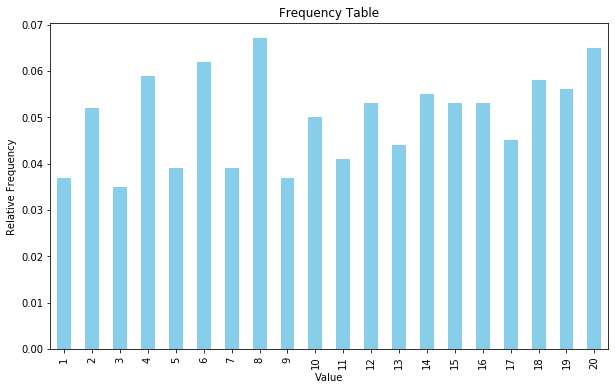

In [36]:
# Plot the frequency table
plt.figure(figsize=(10, 6))
tabla_frec.plot(kind='bar', color='skyblue')
plt.title('Frequency Table')
plt.xlabel('Value')
plt.ylabel('Relative Frequency')
plt.show()

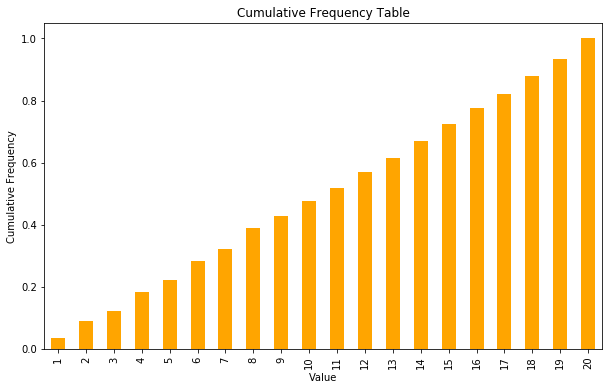

In [37]:
plt.figure(figsize=(10, 6))
tabla_frec_acum.plot(kind='bar', color='orange')
plt.title('Cumulative Frequency Table')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')
plt.show()

In [38]:
# Function to compute the percentile 
def percentile(p):
    for a in val:
        if F(a) >= p:
            return a
        
## Aquí es importante observar que val se presenta ordenado de menor a mayor 
## y se lee (con el for) de izquierda a derecha

percentile_vec = np.vectorize(percentile)
Q1,Q2,Q3=percentile_vec([0.25,0.5,0.75])
[Q1,Q2,Q3]

[6, 10, 16]

In [39]:
# Compare the theoretical and empirical mean, variance, and standard deviation
print(f"Empirical Mean: {np.mean(datos)}, Theoretical Mean: {media_X}")
print(f"Empirical Variance: {np.var(datos)}, Theoretical Variance: {var_X}")
print(f"Empirical Standard Deviation: {np.std(datos)}, Theoretical Standard Deviation: {dt_X}")

# Quantiles (25th, 50th, 75th percentiles)
Q = np.quantile(datos, [0.25, 0.5, 0.75])
print("Empirical Quantiles (25%, 50%, 75%):", Q)

# Theoretical percentiles
percentiles = np.array([percentile(0.25), percentile(0.5), percentile(0.75)])
print("Theoretical Percentiles (25%, 50%, 75%):", percentiles)

Empirical Mean: 10.936, Theoretical Mean: 10.6
Empirical Variance: 33.625904000000006, Theoretical Variance: 33.24
Empirical Standard Deviation: 5.798784700262634, Theoretical Standard Deviation: 5.76541412215983
Empirical Quantiles (25%, 50%, 75%): [ 6. 11. 16.]
Theoretical Percentiles (25%, 50%, 75%): [ 6 10 16]


## 3.
<font color='blue'> Una variable aleatoria puede tomar valores 
$\{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10\}$ con probabilidades
$$P(X = i) = k · (i + i^2)$$
* ¿Qué valor debe tener k?
* Analiza la variable (es decir, calcula media y desviación típica y dibuja las funciones de probabilidad y  distribución)
* Calcula $E[2X^3 − X^2+X]$
* Calcula, usando la función de distribución, las probabilidades $P (X \geq 3) $ y $P (4 < X \leq 8)$. 
* Calcula los cuartiles Q1, Q2 y Q3, el rango intercuartílico e indica si hay datos atípicos. 
* Haz un programa que simule la variable anterior. Genera 1000 datos y compara sus tablas de frecuencias relativas  y relativas acumuladas, barplot, media y varianza con los resultados de los apartados anteriores.
</font>

In [40]:
val = np.arange(0, 11)
val

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [41]:
s=sum(val+val**2)
k=1/s
prob=k*(val+val**2)
prob

array([0.        , 0.00454545, 0.01363636, 0.02727273, 0.04545455,
       0.06818182, 0.09545455, 0.12727273, 0.16363636, 0.20454545,
       0.25      ])

In [42]:
sum(prob)

1.0

In [43]:
# f(x): devuelve la probabilidad asociada al valor x
def f(x):
    return prob[val == x]

# Vectoriza la función para que acepte arrays
f = np.vectorize(f)

# F(x): suma acumulada de probabilidades para val <= x
def F(x):
    return np.sum(prob[val <= x])

# Vectoriza también esta función
F = np.vectorize(F)

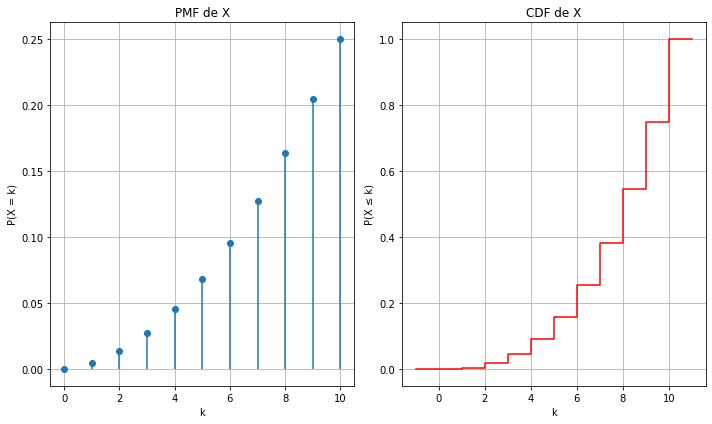

In [44]:
# Gráficas 

plt.figure(figsize=(10, 6))

# Gráfica de la función densidad de probabilidad (PMF) f_X
plt.subplot(1, 2, 1)
plt.stem(val, f_vec(val), basefmt=" ", use_line_collection=True)
plt.title("PMF de X")
plt.xlabel("k")
plt.ylabel("P(X = k)")
plt.grid(True)

# Gráfica de la función distribución de probabilidad (CDF) F_X
plt.subplot(1, 2, 2)
x_vals = np.array([min(val)-1, *val, max(val)+1])  # Auxiliary variable for extended range
plt.step(x_vals, F_vec(x_vals), where='post', color='r', linestyle='-')
plt.title("CDF de X")
plt.xlabel("k")
plt.ylabel("P(X ≤ k)")
plt.grid(True)

# Mostramos las gráficas
plt.tight_layout()
plt.show()

In [45]:
# Cálculo de la media (o esperanza)
media_X = np.sum(val * f(val))
print("Media :", media_X)

# Cálculo de la varianza 
var_X = np.sum((val - media_X)**2 * f(val))
print("Varianza :", var_X)

# Cálculo de la desviación típica
dt_X = np.sqrt(var_X)
print("Desviación típica :", dt_X)

Media : 7.75
Varianza : 4.3875
Desviación típica : 2.094636006565341


In [46]:
# Y=2X^3 −X^2+X. Veamos cuál es la media de Y
media_Y = np.sum((2*val**3-val**2+val) * f(val))
print("Media_Y :", media_Y)

Media_Y : 1062.1999999999998


* <font color='blue'> Calcula, usando la función de distribución, las probabilidades $P (X \geq 3) $ y $P (4 < X \leq 8)$. </font>

In [47]:
print(1-F(2))
print(F(8)-F(4))

0.9818181818181818
0.4545454545454545


* <font color='blue'> Calcula los cuartiles Q1, Q2 y Q3, el rango intercuartílico e indica si hay datos atípicos. </font>

In [48]:
# Function to compute the percentile (similar to the R version)
def percentile(p):
    for a in val:
        if F(a) >= p:
            return a
percentile_vec = np.vectorize(percentile)
Q1,Q2,Q3=percentile_vec([0.25,0.5,0.75])
[Q1,Q2,Q3]

[6, 8, 9]

In [49]:
RI=Q3-Q1
O1,O2=[Q1-1.5*RI,Q3+1.5*RI]
O1,O2

(1.5, 13.5)

El único valor atípico es $1$.

* <font color='blue'>Haz un programa que simule la variable anterior. Genera 1000 datos y compara sus tablas de frecuencias relativas  y relativas acumuladas, barplot, media y varianza con los resultados de los apartados anteriores. </font>

In [50]:
# Generate 10000 samples from the distribution defined by prob
datos = np.random.choice(val, size=1000, p=prob, replace=True)

# Frequency table and its cumulative sum
tabla_frec = pd.Series(datos).value_counts(normalize=True).sort_index()
tabla_frec_acum = tabla_frec.cumsum()

print("Frequency table:", tabla_frec)
print("Cumulative frequency table:", tabla_frec_acum)

Frequency table: 1     0.006
2     0.012
3     0.028
4     0.043
5     0.058
6     0.088
7     0.139
8     0.179
9     0.186
10    0.261
dtype: float64
Cumulative frequency table: 1     0.006
2     0.018
3     0.046
4     0.089
5     0.147
6     0.235
7     0.374
8     0.553
9     0.739
10    1.000
dtype: float64


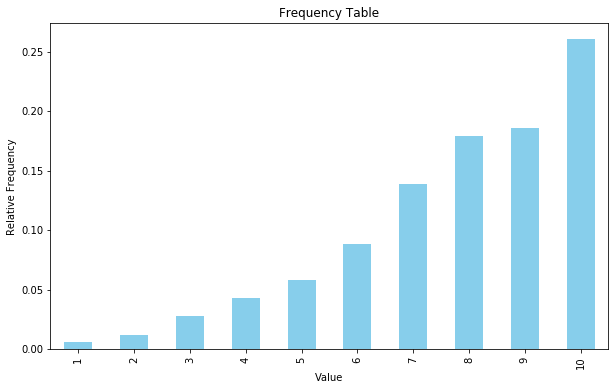

In [51]:
# Plot the frequency table
plt.figure(figsize=(10, 6))
tabla_frec.plot(kind='bar', color='skyblue')
plt.title('Frequency Table')
plt.xlabel('Value')
plt.ylabel('Relative Frequency')
plt.show()

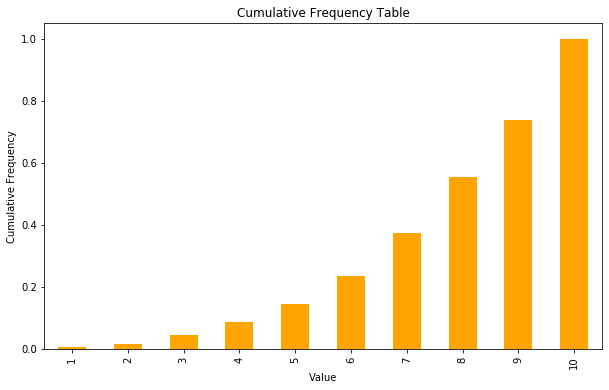

In [52]:
plt.figure(figsize=(10, 6))
tabla_frec_acum.plot(kind='bar', color='orange')
plt.title('Cumulative Frequency Table')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')
plt.show()

In [53]:
# Compare the theoretical and empirical mean, variance, and standard deviation
print(f"Empirical Mean: {np.mean(datos)}, Theoretical Mean: {media_X}")
print(f"Empirical Variance: {np.var(datos)}, Theoretical Variance: {var_X}")
print(f"Empirical Standard Deviation: {np.std(datos)}, Theoretical Standard Deviation: {dt_X}")

# Quantiles (25th, 50th, 75th percentiles)
Q = np.quantile(datos, [0.25, 0.5, 0.75])
print("Empirical Quantiles (25%, 50%, 75%):", Q)

# Theoretical percentiles
percentiles = np.array([percentile(0.25), percentile(0.5), percentile(0.75)])
print("Theoretical Percentiles (25%, 50%, 75%):", percentiles)

Empirical Mean: 7.793, Theoretical Mean: 7.75
Empirical Variance: 4.314151, Theoretical Variance: 4.3875
Empirical Standard Deviation: 2.077053441777558, Theoretical Standard Deviation: 2.094636006565341
Empirical Quantiles (25%, 50%, 75%): [ 7.  8. 10.]
Theoretical Percentiles (25%, 50%, 75%): [6 8 9]


# 4. 
<font color='blue'>En un puesto de una feria se venden boletos a 1 euro. Hay un 15% de boletos con un premio de 2 euros, 
un 5% con premio de 3 euros y un 1% con premio de 10 euros. Sea X la variable aleatoria “ganancia del tendero 
por boleto”. Hallar la función de probabilidad de X, la función de distribución y la ganancia media por boleto.  Representar ambas funciones gráficamente.</font>

## Solución:
* ¿En qué consiste el experimento aleatorio?. 
En coger (comprar) un boleto, al azar, y comprobar el premio que tiene.
* ¿Cuáles son los posibles resultados del experimento?. Espacio muestral: Ω
A2=Que el boleto elegido tenga un premio de 2 euros
A3=Que tenga un premio de 3 euros, 
A10= Que tenga un premio de 10 euros, y 
A0= Que no tenga ningún premio.
* ¿Cuál es la v.a. definida sobre el espacio muestral?  X(A2)= -1, X(A3)=-2, X(A10)=-9, X(A0)=1

Introducimos la v.a. X="ganancia del tendero por boleto"

In [54]:
val = np.array([-9,-2,-1,1])
val

array([-9, -2, -1,  1])

In [55]:
prob = np.array([0.01,0.05,0.15,0.79]) # función puntual de probabilidad. 
sum(prob) # Comprobamos que la suma de las probabilidades vale 1.

1.0

In [56]:
# f(x): devuelve la probabilidad asociada al valor x
def f(x):
    return prob[val == x]

# Vectoriza la función para que acepte arrays
f = np.vectorize(f)

# F(x): suma acumulada de probabilidades para val <= x
def F(x):
    return np.sum(prob[val <= x])

# Vectoriza también esta función
F = np.vectorize(F)

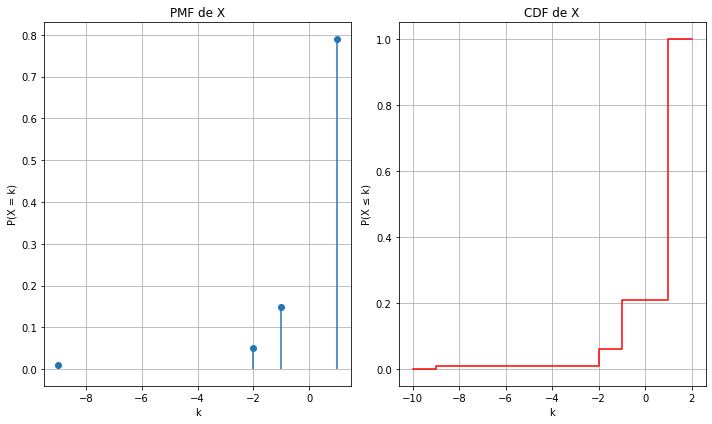

In [57]:
# Gráficas 

plt.figure(figsize=(10, 6))

# Gráfica de la función densidad de probabilidad (PMF) f_X
plt.subplot(1, 2, 1)
plt.stem(val, f_vec(val), basefmt=" ", use_line_collection=True)
plt.title("PMF de X")
plt.xlabel("k")
plt.ylabel("P(X = k)")
plt.grid(True)

# Gráfica de la función distribución de probabilidad (CDF) F_X
plt.subplot(1, 2, 2)
x_vals = np.array([min(val)-1, *val, max(val)+1])  # Auxiliary variable for extended range
plt.step(x_vals, F_vec(x_vals), where='post', color='r', linestyle='-')
plt.title("CDF de X")
plt.xlabel("k")
plt.ylabel("P(X ≤ k)")
plt.grid(True)

# Mostramos las gráficas
plt.tight_layout()
plt.show()

In [58]:
# Cálculo de la media (o esperanza)
media_X = np.sum(val * f(val))
print("Media :", media_X)

# Cálculo de la varianza 
var_X = np.sum((val - media_X)**2 * f(val))
print("Varianza :", var_X)

# Cálculo de la desviación típica
dt_X = np.sqrt(var_X)
print("Desviación típica :", dt_X)

Media : 0.45000000000000007
Varianza : 1.7475
Desviación típica : 1.3219304066402287


# 5. 
<font color='blue'>Tenemos dos dados, uno de seis caras, marcadas del 1 al 6, y otro de 8 caras (como los que se usan en algunos juegos de rol) marcadas del 1 al 8, ambos bien equilibrados. Los lanzamos a la vez y consideramos las variables aleatorias X = resultado obtenido en el primer dado, Y = resultado obtenido en el segundo dado, S = max(X, Y ).
* Calcula las funciones de probabilidad de las tres variables aleatorias y represéntalas gráficamente.
* Para cada una de ellas calcula su esperanza y su desviación típica
*  Halla la probabilidad de que el máximo de los dos valores sea menor que 5 supuesto que el resultado en el segundo dado ha sido 2
</font>


In [73]:
# X = Resultado obtenido en el primer dado (el de 6 caras)
val=np.array([1,2,3,4,5,6])
prob=np.array([1/6,1/6,1/6,1/6,1/6,1/6])

In [74]:
# f_X(x): devuelve la probabilidad asociada al valor x
def fX(x):
    return prob[val == x]

# Vectoriza la función para que acepte arrays
fX = np.vectorize(fX)

# F_X(x): suma acumulada de probabilidades para val <= x
def FX(x):
    return np.sum(prob[val <= x])

# Vectoriza también esta función
FX = np.vectorize(FX)

In [75]:
# Cálculo de la media (o esperanza)
media_X = np.sum(val * f(val))
print("Media :", media_X)

# Cálculo de la varianza 
var_X = np.sum((val - media_X)**2 * f(val))
print("Varianza :", var_X)

# Cálculo de la desviación típica
dt_X = np.sqrt(var_X)
print("Desviación típica :", dt_X)

Media : 3.5
Varianza : 2.9166666666666665
Desviación típica : 1.707825127659933


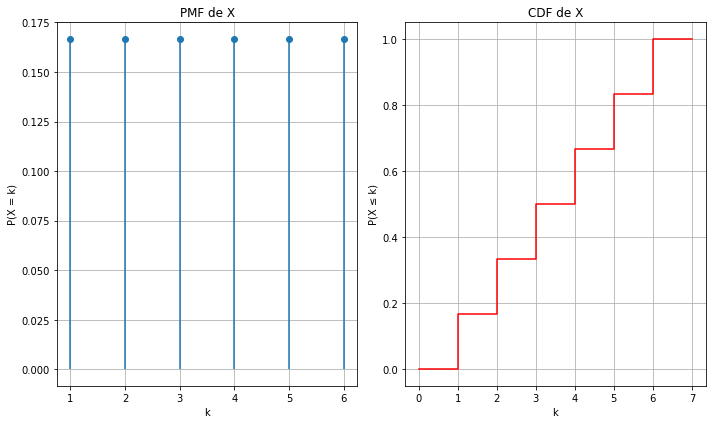

In [76]:
# Gráficas 

plt.figure(figsize=(10, 6))

# Gráfica de la función densidad de probabilidad (PMF) f_X
plt.subplot(1, 2, 1)
plt.stem(val, fX(val), basefmt=" ", use_line_collection=True)
plt.title("PMF de X")
plt.xlabel("k")
plt.ylabel("P(X = k)")
plt.grid(True)

# Gráfica de la función distribución de probabilidad (CDF) F_X
plt.subplot(1, 2, 2)
x_vals = np.array([min(val)-1, *val, max(val)+1])  # Auxiliary variable for extended range
plt.step(x_vals, FX(x_vals), where='post', color='r', linestyle='-')
plt.title("CDF de X")
plt.xlabel("k")
plt.ylabel("P(X ≤ k)")
plt.grid(True)

# Mostramos las gráficas
plt.tight_layout()
plt.show()

In [77]:
# Y = Resultado obtenido en el segundo dado (el de 8 caras)
val=np.array([1,2,3,4,5,6,7,8])
prob=np.array([1/8,1/8,1/8,1/8,1/8,1/8,1/8,1/8])

In [78]:
# f_Y(x): devuelve la probabilidad asociada al valor x
def fY(x):
    return prob[val == x]

# Vectoriza la función para que acepte arrays
fY = np.vectorize(fY)

# F_Y(x): suma acumulada de probabilidades para val <= x
def FY(x):
    return np.sum(prob[val <= x])

# Vectoriza también esta función
FY = np.vectorize(FY)

In [79]:
# Cálculo de la media (o esperanza)
media_Y = np.sum(val * f(val))
print("Media :", media_Y)

# Cálculo de la varianza 
var_Y = np.sum((val - media_Y)**2 * f(val))
print("Varianza :", var_Y)

# Cálculo de la desviación típica
dt_Y = np.sqrt(var_Y)
print("Desviación típica :", dt_Y)

Media : 4.5
Varianza : 5.25
Desviación típica : 2.29128784747792


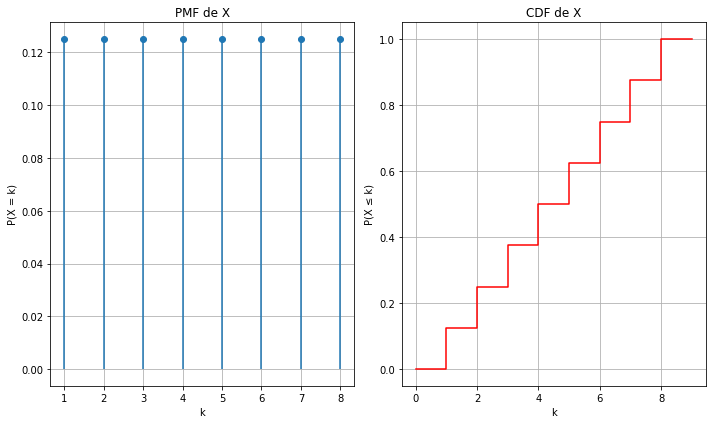

In [80]:
# Gráficas 

plt.figure(figsize=(10, 6))

# Gráfica de la función densidad de probabilidad (PMF) f_X
plt.subplot(1, 2, 1)
plt.stem(val, fY(val), basefmt=" ", use_line_collection=True)
plt.title("PMF de X")
plt.xlabel("k")
plt.ylabel("P(X = k)")
plt.grid(True)

# Gráfica de la función distribución de probabilidad (CDF) F_X
plt.subplot(1, 2, 2)
x_vals = np.array([min(val)-1, *val, max(val)+1])  # Auxiliary variable for extended range
plt.step(x_vals, FY(x_vals), where='post', color='r', linestyle='-')
plt.title("CDF de X")
plt.xlabel("k")
plt.ylabel("P(X ≤ k)")
plt.grid(True)

# Mostramos las gráficas
plt.tight_layout()
plt.show()

Probabilidades de S: [0.02083333 0.0625     0.10416667 0.14583333 0.1875     0.22916667
 0.125      0.125     ]


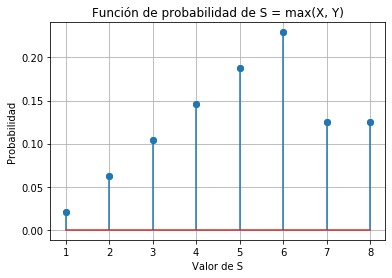

Media de S: 5.229166666666667
Varianza de S: 3.2599826388888893
Desviación típica de S: 1.805542200805312


In [81]:
# Valores que puede tomar la variable aleatoria S = max(X, Y)
val_S = np.arange(1, 9)  # {1, 2, ..., 8}

# Probabilidades respectivas (calculadas previamente)
prob_S = np.array([1, 3, 5, 7, 9, 11, 6, 6]) / 48

# Mostrar probabilidades
print("Probabilidades de S:", prob_S)

# Dibujo de la función de probabilidad
plt.stem(val_S, prob_S, use_line_collection=True)
plt.plot(val_S, prob_S, 'o')
plt.title("Función de probabilidad de S = max(X, Y)")
plt.xlabel("Valor de S")
plt.ylabel("Probabilidad")
plt.grid(True)
plt.show()

# Cálculo de la media de la v.a. S
media_S = np.sum(val_S * prob_S)
print("Media de S:", media_S)

# Varianza y desviación típica
var_S = np.sum((val_S - media_S) ** 2 * prob_S)
std_S = np.sqrt(var_S)

print("Varianza de S:", var_S)
print("Desviación típica de S:", std_S)


Apartado c) Halla la probabilidad de que el máximo de los dos valores sea menor que 5 
 supuesto que el resultado en el segundo dado ha sido 2.

(En pizarra)
